In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt_clf = DecisionTreeClassifier()
# dt_clf = DecisionTreeClassifier(max_depth=3)
# dt_clf = DecisionTreeClassifier(min_samples_split=4)
# dt_clf = DecisionTreeClassifier(min_samples_leaf=4)

In [3]:
iris_data = load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=11)

In [5]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
from sklearn.tree import export_graphviz

In [7]:
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
               feature_names=iris_data.feature_names, impurity=True, filled=True)

In [8]:
import graphviz

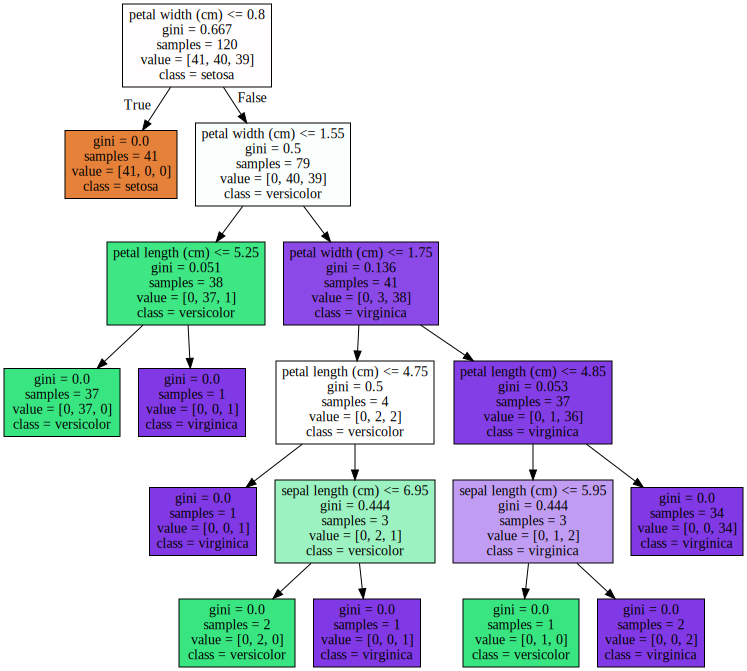

In [9]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
pred = dt_clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test, pred)

0.8666666666666667

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [14]:
dt_clf.feature_importances_

array([0.03334028, 0.        , 0.0403415 , 0.92631822])

sepal length (cm) : 0.03334027922483851
sepal width (cm) : 0.0
petal length (cm) : 0.04034150073346837
petal width (cm) : 0.9263182200416932


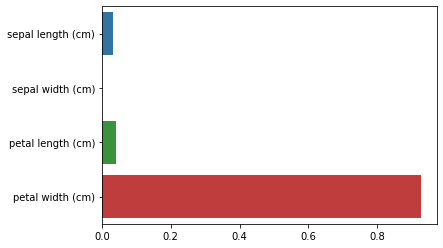

In [15]:
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_): # iris... -> name, dt... -> value
    print("{} : {}".format(name, value))
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)